# Restricted Boltzmann Machine Testing

In [31]:
import numpy as np
import pickle
from struct import unpack
import gzip
import matplotlib.pyplot as plt

from RBM import RBM

## Loading Weight and bias to the RBM model for testing purpose

In [32]:
#calling model for testing purpose
model_test = RBM(n_visible=28*28, n_hidden=144)

#Loading Weight
rbm_weight_file = open("model/rbm_weight.npy",'rb')
model_test.weight = pickle.load(rbm_weight_file)

#Loading visible layer bias
rbm_v_bias_file = open("model/rbm_v_bias.npy",'rb')
model_test.v_bias = pickle.load(rbm_v_bias_file)

#Loading hidden layer bias
rbm_h_bias_file = open("model/rbm_h_bias.npy",'rb')
model_test.h_bias = pickle.load(rbm_h_bias_file)

## Loading Dataset

In [33]:
#Dataset
f = gzip.open("../data/mnist.pkl.gz", "rb")
data = pickle.load(f,encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data

In [48]:
"""Plotting and Testing of Restricted Boltzmann Machine"""
number = 150
visible = x_test[number].reshape(1,784).copy()

#K =1
prob_h_given_v, h_sample = model_test.sample_h_given_v(visible)
prob_v_given_h0, v_sample_0 = model_test.sample_v_given_h(h_sample)

#K = 2
prob_h_given_v1, h_sample_1 = model_test.sample_h_given_v(prob_v_given_h0)
prob_v_given_h1, v_sample_1 = model_test.sample_v_given_h(h_sample_1)

#K = 3
prob_h_given_v2, h_sample_2 = model_test.sample_h_given_v(prob_v_given_h1)
prob_v_given_h2, v_sample_2 = model_test.sample_v_given_h(h_sample_2)

#x = v_sample_k.reshape(28,28)
x = prob_v_given_h0.reshape(28,28)

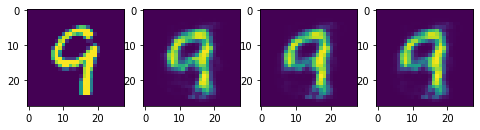

In [49]:
fig=plt.figure(figsize=(8, 8))

fig.add_subplot(1, 4, 1)
plt.imshow(visible.reshape(28,28))

fig.add_subplot(1, 4, 2)
plt.imshow(prob_v_given_h0.reshape(28,28))

fig.add_subplot(1, 4, 3)
plt.imshow(prob_v_given_h1.reshape(28,28))

fig.add_subplot(1, 4, 4)
plt.imshow(prob_v_given_h1.reshape(28,28))

# Classification of Pixels 

In [76]:
from Linear import Linear
model_linear = Linear()

In [77]:
#Loading weight to the model
classifier_weight_file = open("model/classifier_weight.npy",'rb')
model_linear.weight = pickle.load(classifier_weight_file)

#Loading bias to the model
classifier_bias_file = open("model/classifier_bias.npy",'rb')
model_linear.bias = pickle.load(classifier_bias_file)

predicted_label 4


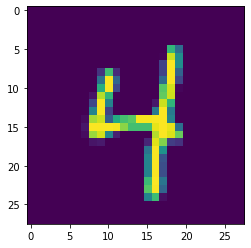

In [78]:
img_num = 19

test_input = x_test[img_num].copy().reshape(1,784)/255.0
test_target = y_test[img_num]

predicted_label = np.argmax(model_linear.forward(test_input))

fig2 = plt.figure(figsize=(4, 4))
# fig2.add_subplot(1, 1, 1)
plt.imshow(x_test[img_num])


print("predicted_label", predicted_label)

# Classififcation using Restricted Boltzmann Machine hidden features

In [79]:
hidden_features, hidden_sample  = prob_h_given_v, h_sample